# Test Data Science

#Credit Risk Evaluation Using Machine Learning

#Abstract
This project aims to provide credit access to individuals with limited or no credit history by leveraging alternative data sources to assess their creditworthiness. Data such as annual income, the price of goods (i.e., the product for which the loan is applied), the population of the applicant’s region, the age of their phone number, and similar features were used to estimate credit risk.

The collected data was examined for inconsistencies that could negatively impact the performance of the machine learning model, using data visualization and exploratory data analysis techniques. Relevant features were identified by calculating the correlation between all available features and the target variable—a binary indicator representing whether an individual defaulted on a loan or not.

Both basic and advanced data cleaning techniques were applied to address identified issues at various stages. To evaluate the model’s predictive performance on loan default, evaluation methods such as cross-validation scores, accuracy, confusion matrix, precision, and recall were used.

Initial data visualization revealed that a majority of applicants were female, most applied for loans without accompaniment, and a significant portion were married. Further analysis indicated a class imbalance in the target variable, meaning that the distribution of defaults (1s) and non-defaults (0s) was unequal. This imbalance negatively affected the model's performance and was addressed by applying a class balancing technique.

The model was then retrained and achieved a 95% F1-score in predicting credit default using the Extreme Gradient Boosting (XGBoost) machine learning algorithm, after addressing class imbalance with the Synthetic Minority Over-sampling Technique (SMOTE).

#Loading Libraries

In [370]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


#Loading the data

In [371]:
credit=pd.read_csv('credit_scoring.csv')
credit

application_id  age  monthly_income  loan_amount  previous_defaults  \
0             501000   41        13995609      5982664                  0   
1             501001   58        13683833      3711198                  0   
2             501002   33         9417391      7172332                  0   
3             501003   45         6861811      8661056                  0   
4             501004   22         5640742      4520669                  1   
5             501005   22         7783669     13057356                  1   
6             501006   22        15252800      4009613                  1   
7             501007   35        17437764      3871786                  0   
8             501008   35        12499029     13703265                  0   
9             501009   38        11650601     12664024                  0   
10            501010   25         4689464     14801912                  0   
11            501011   46         3252423     11247200                  1   
12            501012   50        13695086     10720916                  0   
13            501013   34        17358863      2735748                  1   
14            501014   25         7323836      6576346                  0   
15            501015   41         8010432      5529561                  0   
16            501016   28        17784749      1979901                  0   
17            501017   26        13987315      8828245                  0   
18            501018   46         4594577      4472329                  0   
19            501019   24        17630973      2758195                  0   
20            501020   50         7288230      1440782                  0   
21            501021   55        10975019      2102429                  0   
22            501022   47        10803049      4631906                  0   
23            501023   47         5195630      8939213                  0   
24            501024   25         7809845      3380630                  0   
25            501025   31        12871140      4999366                  0   
26            501026   55         8640963      9561773                  0   
27            501027   31        19569994      2589465                  0   
28            501028   58        11806990      8312137                  1   
29            501029   58        14536974      9891899                  0   
30            501030   25        14549340      1181597                  1   
31            501031   57         9273136     14713097                  0   
32            501032   57        11894250      4934489                  0   
33            501033   46        17686758     12407093                  0   
34            501034   53        13809623      6996433                  0   
35            501035   53        12226804     10467840                  0   
36            501036   43        13421376     11978306                  0   
37            501037   27         8204076     11792552                  0   
38            501038   52         9261431      9901193                  0   
39            501039   29         3906961     10376796                  1   
40            501040   36        16424284      1142724                  0   
41            501041   29         8782110      2022975                  0   
42            501042   48        12290698      8908164                  0   
43            501043   43        18478461      9394894                  0   
44            501044   32        15625493     14449817                  0   
45            501045   29         6985739      9332569                  0   
46            501046   32        15105213      5467747                  0   
47            501047   29         5381443      8335427                  0   
48            501048   39        15818741      4207158                  0   
49            501049   56        17310464      7216186                  0   
50            501050   53         8082537     10701209                  0   
51

#Drop Leakage Columns

In [372]:
leak_cols = ['leak_col_good', 'leak_col_subtle']
leak_cols_present = [col for col in leak_cols if col in credit.columns]

credit = credit.drop(columns=leak_cols_present)
credit

application_id  age  monthly_income  loan_amount  previous_defaults  \
0             501000   41        13995609      5982664                  0   
1             501001   58        13683833      3711198                  0   
2             501002   33         9417391      7172332                  0   
3             501003   45         6861811      8661056                  0   
4             501004   22         5640742      4520669                  1   
5             501005   22         7783669     13057356                  1   
6             501006   22        15252800      4009613                  1   
7             501007   35        17437764      3871786                  0   
8             501008   35        12499029     13703265                  0   
9             501009   38        11650601     12664024                  0   
10            501010   25         4689464     14801912                  0   
11            501011   46         3252423     11247200                  1   
12            501012   50        13695086     10720916                  0   
13            501013   34        17358863      2735748                  1   
14            501014   25         7323836      6576346                  0   
15            501015   41         8010432      5529561                  0   
16            501016   28        17784749      1979901                  0   
17            501017   26        13987315      8828245                  0   
18            501018   46         4594577      4472329                  0   
19            501019   24        17630973      2758195                  0   
20            501020   50         7288230      1440782                  0   
21            501021   55        10975019      2102429                  0   
22            501022   47        10803049      4631906                  0   
23            501023   47         5195630      8939213                  0   
24            501024   25         7809845      3380630                  0   
25            501025   31        12871140      4999366                  0   
26            501026   55         8640963      9561773                  0   
27            501027   31        19569994      2589465                  0   
28            501028   58        11806990      8312137                  1   
29            501029   58        14536974      9891899                  0   
30            501030   25        14549340      1181597                  1   
31            501031   57         9273136     14713097                  0   
32            501032   57        11894250      4934489                  0   
33            501033   46        17686758     12407093                  0   
34            501034   53        13809623      6996433                  0   
35            501035   53        12226804     10467840                  0   
36            501036   43        13421376     11978306                  0   
37            501037   27         8204076     11792552                  0   
38            501038   52         9261431      9901193                  0   
39            501039   29         3906961     10376796                  1   
40            501040   36        16424284      1142724                  0   
41            501041   29         8782110      2022975                  0   
42            501042   48        12290698      8908164                  0   
43            501043   43        18478461      9394894                  0   
44            501044   32        15625493     14449817                  0   
45            501045   29         6985739      9332569                  0   
46            501046   32        15105213      5467747                  0   
47            501047   29         5381443      8335427                  0   
48            501048   39        15818741      4207158                  0   
49            501049   56        17310464      7216186                  0   
50            501050   53         8082537     10701209                  0   
51

#Exploratory Data Analysis

In [373]:
#First few rows of data
credit.head()

application_id  age  monthly_income  loan_amount  previous_defaults  \
0          501000   41        13995609      5982664                  0   
1          501001   58        13683833      3711198                  0   
2          501002   33         9417391      7172332                  0   
3          501003   45         6861811      8661056                  0   
4          501004   22         5640742      4520669                  1   

   credit_score  default  
0           624        0  
1           809        0  
2           647        0  
3           450        0  
4           816        0

In [374]:
#size of the data
print("The data has", credit.shape[0],"rowsand", credit.shape[1],"columns")

The data has 6000 rowsand 7 columns


In [375]:
#Viewing a sample of column naes to understand the dataset
credit = credit.rename(columns=str.lower)  #changing column names to lower case
credit.columns


Index(['application_id', 'age', 'monthly_income', 'loan_amount',
       'previous_defaults', 'credit_score', 'default'],
      dtype='object')

In [376]:
#To enable printing f information of all columns
pd.set_option('display.max_rows', None)

In [377]:
#Names of columns and their data types
credit.dtypes

application_id       int64
age                  int64
monthly_income       int64
loan_amount          int64
previous_defaults    int64
credit_score         int64
default              int64
dtype: object

#Summary Statistics
Understanding Target variable values
The data frame has a deafult variable

In [378]:
credit['default'].unique()


array([0, 1])

In [379]:
#Summary statistics of all the 9 columns
credit.describe().T

count          mean           std        min         25%  \
application_id     6000.0  5.039995e+05  1.732195e+03   501000.0   502499.75   
age                6000.0  4.032150e+01  1.130070e+01       21.0       31.00   
monthly_income     6000.0  1.140386e+07  4.912598e+06  3000310.0  7163379.00   
loan_amount        6000.0  8.001122e+06  4.071786e+06  1000794.0  4440939.00   
previous_defaults  6000.0  2.436667e-01  4.847670e-01        0.0        0.00   
credit_score       6000.0  5.759798e+02  1.583289e+02      300.0      438.75   
default            6000.0  1.216667e-02  1.096387e-01        0.0        0.00   

                          50%          75%         max  
application_id       503999.5    505499.25    506999.0  
age                      41.0        50.00        59.0  
monthly_income     11299453.0  15737051.75  19986217.0  
loan_amount         7982303.5  11531445.00  14998580.0  
previous_defaults         0.0         0.00         3.0  
credit_score            577.5       713.00       849.0  
default                   0.0         0.00         1.0

#Data wrangling

#Missing Values

In [380]:
credit_missing = credit.isna().sum()
credit_missing.sort_values(ascending=False)


application_id       0
age                  0
monthly_income       0
loan_amount          0
previous_defaults    0
credit_score         0
default              0
dtype: int64

In [381]:
def get_outliers(df):

   q1=credit.quantile(0.25)
   q3=credit.quantile(0.75)
   IQR=q3-q1
   outliers = credit[((credit<(q1-1.5*IQR)) | (credit>(q3+1.5*IQR)))]

   return outliers

outliers = get_outliers(credit)
outliers.count().sort_values(ascending=False)

previous_defaults    1314
default                73
application_id          0
monthly_income          0
age                     0
loan_amount             0
credit_score            0
dtype: int64

#Data Visualization

Which gender borrowed the highest?

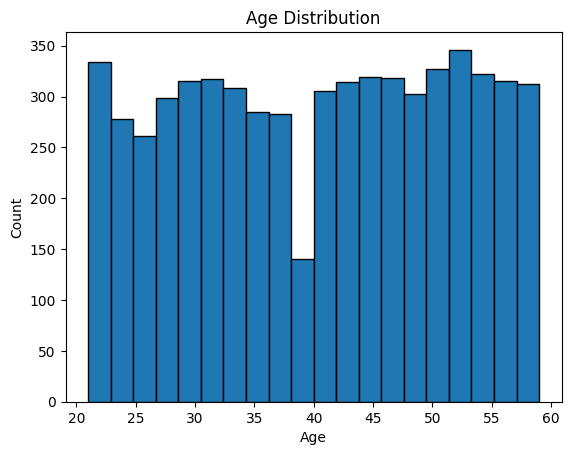

In [382]:
credit['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

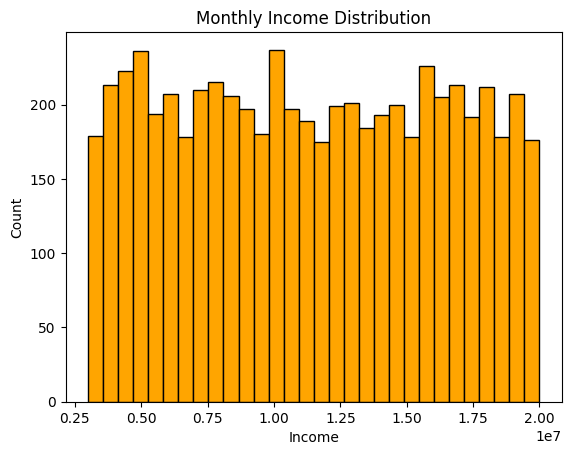

In [383]:
credit['monthly_income'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Default Distribution')

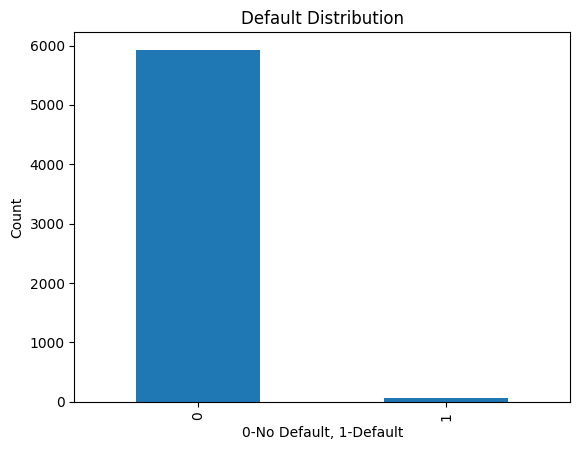

In [384]:
credit['default'].value_counts().plot(kind='bar')
plt.xlabel("0-No Default, 1-Default")
plt.ylabel("Count")
plt.title("Default Distribution")

In [385]:
plt.savefig('default_distribution.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-386-1581053840.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='age',data=credit,hue='default',palette=sns.color_palette("bright"))


Text(0.5, 1.0, 'Agewise distribution of loan default ?')

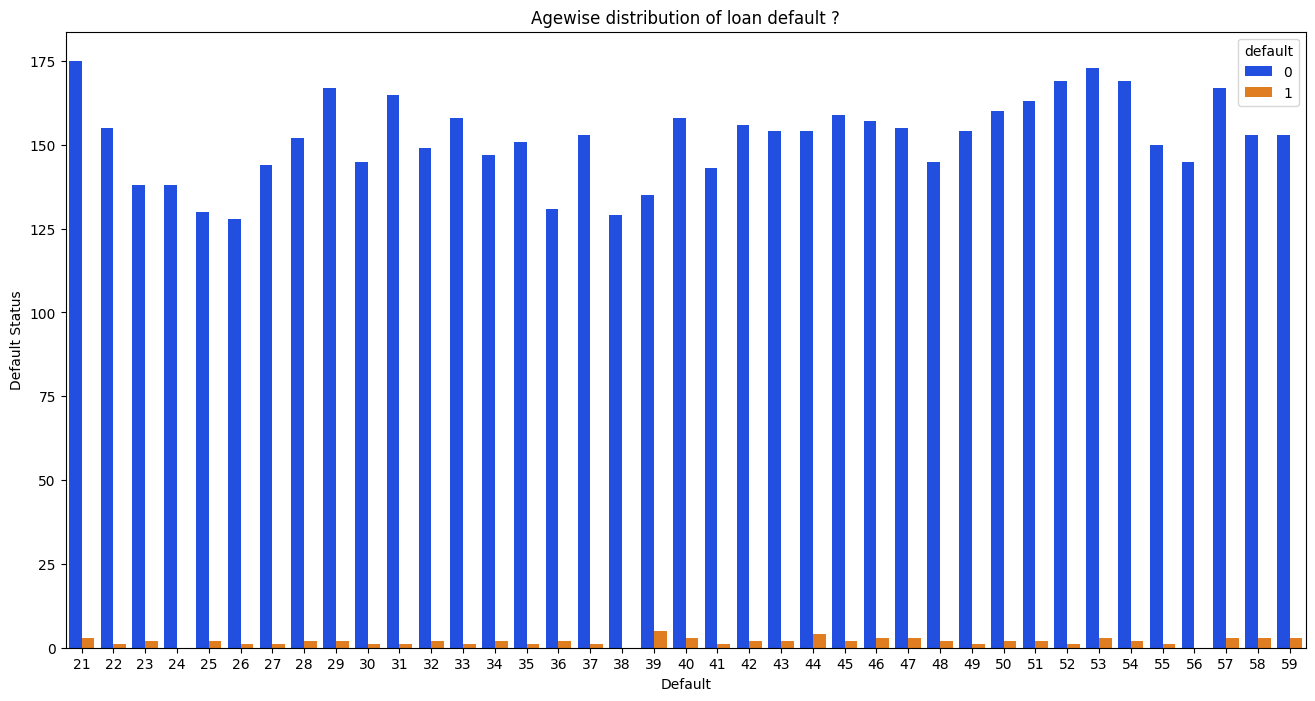

In [386]:
fig,ax = plt.subplots(figsize = (16,8))
sns.countplot(x='age',data=credit,hue='default',palette=sns.color_palette("bright"))
plt.xticks
plt.xlabel("Default")
plt.ylabel("Default Status")
plt.title('Agewise distribution of loan default ?')



In [387]:
credit.head()

application_id  age  monthly_income  loan_amount  previous_defaults  \
0          501000   41        13995609      5982664                  0   
1          501001   58        13683833      3711198                  0   
2          501002   33         9417391      7172332                  0   
3          501003   45         6861811      8661056                  0   
4          501004   22         5640742      4520669                  1   

   credit_score  default  
0           624        0  
1           809        0  
2           647        0  
3           450        0  
4           816        0

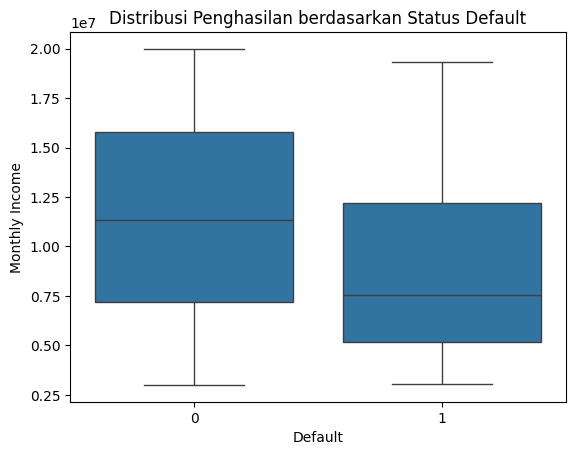

In [388]:

sns.boxplot(x='default', y='monthly_income', data=credit)
plt.title('Distribusi Penghasilan berdasarkan Status Default')
plt.xlabel('Default')
plt.ylabel('Monthly Income')
plt.show()

In [389]:
#Getting rid of extreme values that may affect the data
credit=credit[credit['monthly_income']<30000000]

Text(0.5, 1.0, 'Distribution of client income after removal of outliers')

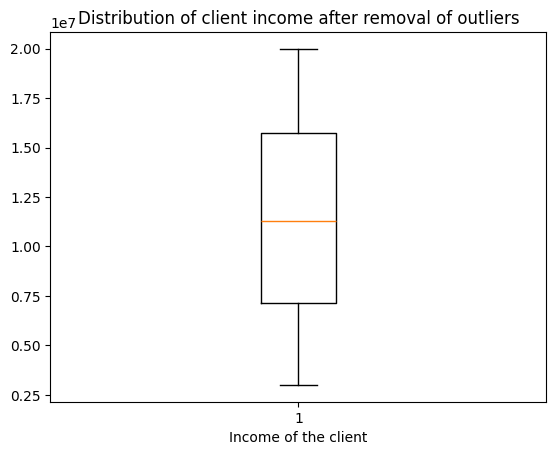

In [390]:
plt.boxplot(credit['monthly_income'])
plt.xlabel("Income of the client")
plt.title('Distribution of client income after removal of outliers')



Text(0.5, 1.0, 'Scatter plot of Credit Amount vs Income ')

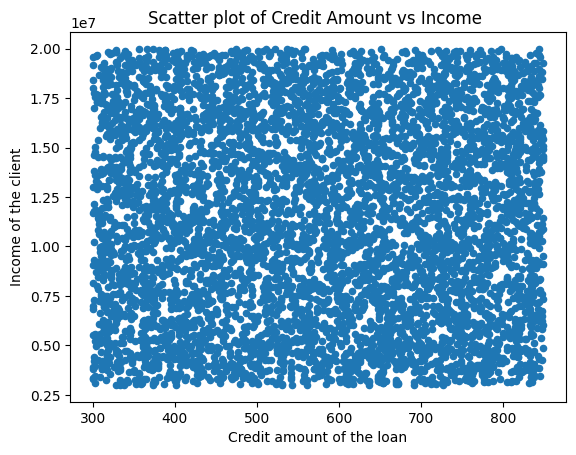

In [391]:
credit.plot(kind='scatter',x='credit_score',y='monthly_income')
plt.xlabel("Credit amount of the loan")
plt.ylabel("Income of the client")
plt.title('Scatter plot of Credit Amount vs Income ')

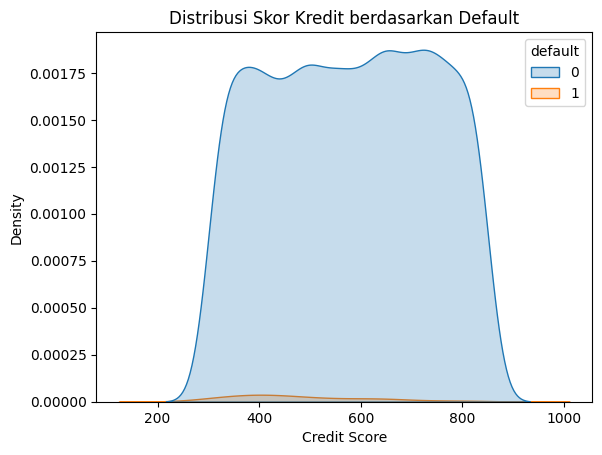

In [392]:
sns.kdeplot(data=credit, x='credit_score', hue='default', fill=True)
plt.title('Distribusi Skor Kredit berdasarkan Default')
plt.xlabel('Credit Score')
plt.show()


#Feature Engineering

In [393]:
credit.head()

application_id  age  monthly_income  loan_amount  previous_defaults  \
0          501000   41        13995609      5982664                  0   
1          501001   58        13683833      3711198                  0   
2          501002   33         9417391      7172332                  0   
3          501003   45         6861811      8661056                  0   
4          501004   22         5640742      4520669                  1   

   credit_score  default  
0           624        0  
1           809        0  
2           647        0  
3           450        0  
4           816        0

In [394]:
cor=credit.corr()
cor_outcome = abs(cor["default"])

In [395]:
#Identifying features that have higher correlation
abv01_corr_outcome = cor_outcome[cor_outcome>0.01]
abv01_corr_outcome

application_id       0.028161
age                  0.011911
monthly_income       0.057138
loan_amount          0.072614
previous_defaults    0.047711
credit_score         0.063527
default              1.000000
Name: default, dtype: float64

In [396]:
# Selecting features with correlation above 0.01 and dropping features that are less correlated with the default variable
df_01=credit[abv01_corr_outcome.index]
df_01.head()



application_id  age  monthly_income  loan_amount  previous_defaults  \
0          501000   41        13995609      5982664                  0   
1          501001   58        13683833      3711198                  0   
2          501002   33         9417391      7172332                  0   
3          501003   45         6861811      8661056                  0   
4          501004   22         5640742      4520669                  1   

   credit_score  default  
0           624        0  
1           809        0  
2           647        0  
3           450        0  
4           816        0

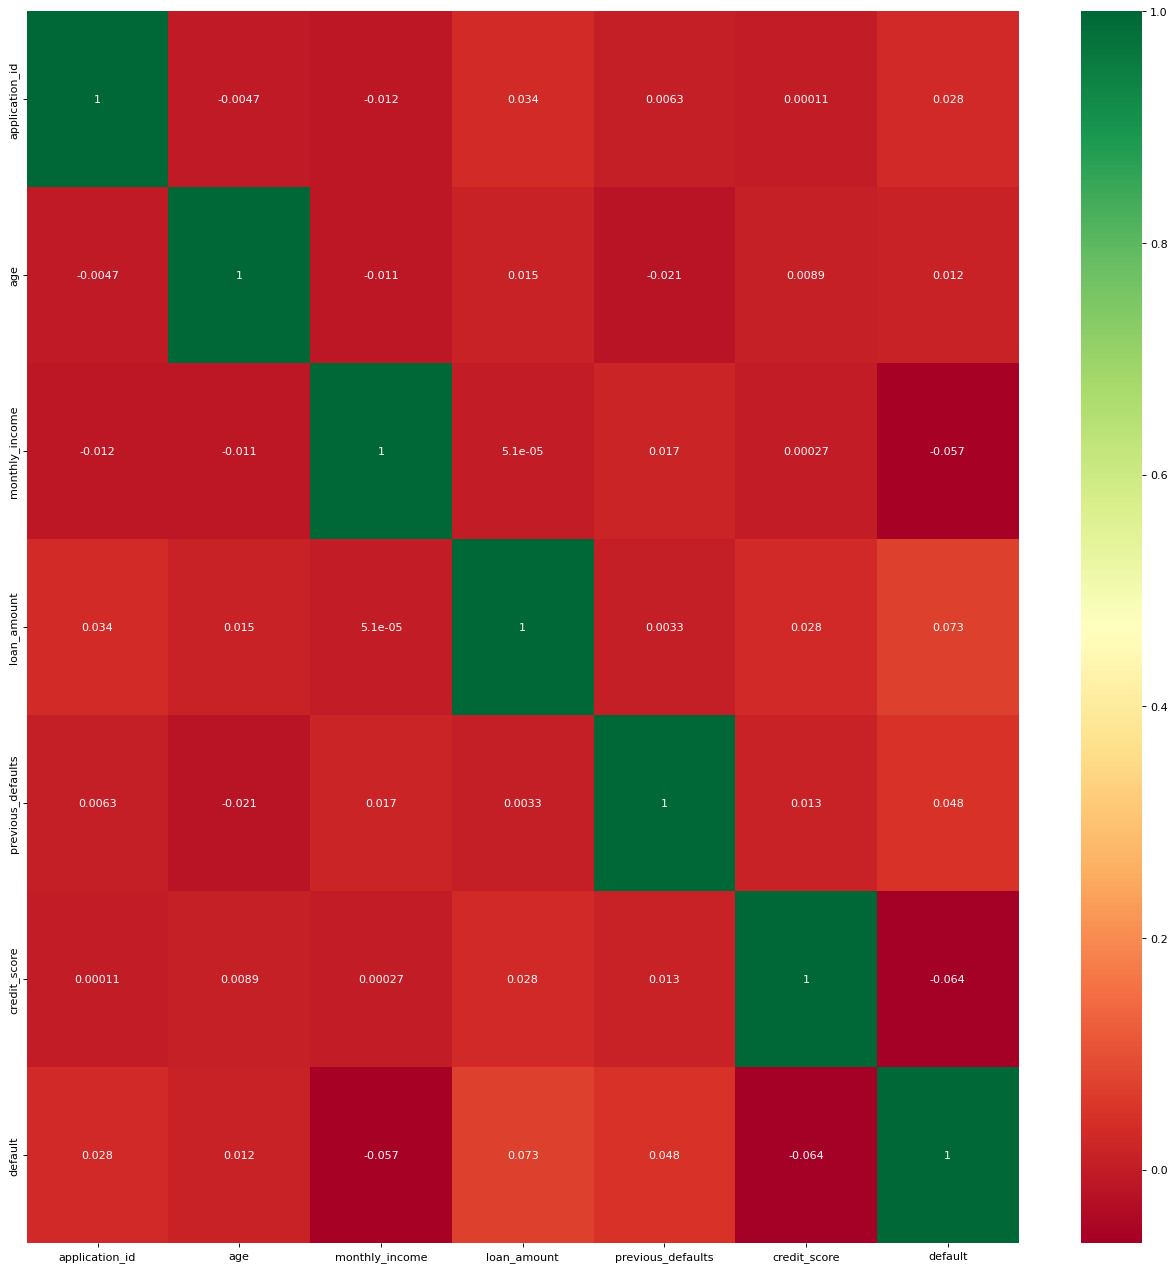

In [397]:
import matplotlib.pyplot as plt

# plotting correlation heatmap
plt.figure(figsize=(20, 20), dpi=80)
dataplot = sns.heatmap(df_01.corr(), cmap="RdYlGn", annot=True)

# displaying heatmap
plt.show()


In [398]:
df_01.dtypes

application_id       int64
age                  int64
monthly_income       int64
loan_amount          int64
previous_defaults    int64
credit_score         int64
default              int64
dtype: object

In [399]:
df_01.describe().T['mean']

application_id       5.039995e+05
age                  4.032150e+01
monthly_income       1.140386e+07
loan_amount          8.001122e+06
previous_defaults    2.436667e-01
credit_score         5.759798e+02
default              1.216667e-02
Name: mean, dtype: float64

#Separating Predictors and default variabels

In [400]:
y_df=df_01['default']
x_df=df_01.drop('default', axis=1)

#Machine Learning Algorithms to predict the credit default indicator

In [401]:
# Initializing an empty disctionary to track accuracy
accuracy={}

#SPLITTING DATA & Scalling

In [402]:
# Splitting the data
X1train, X1test, y1train, y1test = train_test_split(x_df, y_df, test_size = 0.2)

#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1train = sc.fit_transform(X1train)
X1test = sc.transform(X1test)

print("Hasil Scaling X1train:")
print(X1train)

print("\nHasil Scaling X1test:")
print(X1test)

Hasil Scaling X1train:
[[-1.29037871  0.14543657  0.60997033  1.46320886 -0.51042366 -0.27468281]
 [ 0.07737396  0.76643906 -0.68275244  1.32277892 -0.51042366 -0.26833894]
 [-1.32670604 -0.91913914 -0.69565002  0.36959787  1.55015965  0.16304397]
 ...
 [-1.25808775 -1.45142699 -0.97545015 -0.82907966  1.55015965  1.71094737]
 [ 0.0710311  -1.45142699  1.59976437 -0.08526891 -0.51042366 -1.05497837]
 [ 1.25311076  0.32286585 -0.33923783  1.1687425  -0.51042366  0.65152168]]

Hasil Scaling X1test:
[[ 0.57442405 -0.74170985  1.43372096 -1.17039931 -0.51042366  0.11863691]
 [ 0.13734288  0.67772442 -0.99062708 -1.15913394 -0.51042366 -1.57517541]
 [ 0.63612284  0.50029513 -1.38523425 -0.06344739 -0.51042366  0.56270755]
 ...
 [-0.51827887  1.4761562  -1.6837702   0.39292159 -0.51042366  0.49926889]
 [-0.30608115 -0.29813664  0.31747769 -1.42031196  1.55015965 -0.50306199]
 [ 1.10953133 -1.62885627 -1.39936026 -0.67324429 -0.51042366 -0.92175717]]


#Model 1. Logistic Regression (Baseline)

In [403]:
# Model training
model3 = LogisticRegression(multi_class='ovr', random_state=0)
model3.fit(X1train, y1train)

# Evaluasi akurasi
m3_train = model3.score(X1train, y1train)
m3_test = model3.score(X1test, y1test)
print("For the model:", model3, ", the training accuracy is", m3_train, "and the test accuracy is", m3_test)

# Prediksi dan evaluasi
ypred = model3.predict(X1test)

cm1 = confusion_matrix(y1test, ypred)
print("Confusion Matrix:")
print(cm1)

cr1 = classification_report(y1test, ypred)
print("Classification Report:")
print(cr1)


For the model: LogisticRegression(multi_class='ovr', random_state=0) , the training accuracy is 0.9866666666666667 and the test accuracy is 0.9925
Confusion Matrix:
[[1191    0]
 [   9    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1191
           1       0.00      0.00      0.00         9

    accuracy                           0.99      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.99      0.99      0.99      1200



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

# Model 2: Extreme Gradient Booster

In [404]:

# Model training
model3_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model3_xgb.fit(X1train, y1train)

# Evaluasi akurasi
m3_train_xgb = model3_xgb.score(X1train, y1train)
m3_test_xgb = model3_xgb.score(X1test, y1test)
print("For the model:", model3_xgb, ", the training accuracy is", m3_train_xgb, "and the test accuracy is", m3_test_xgb)

# Prediksi dan evaluasi
ypred_xgb = model3_xgb.predict(X1test)

cm1_xgb = confusion_matrix(y1test, ypred_xgb)
print("Confusion Matrix:")
print(cm1_xgb)

cr1_xgb = classification_report(y1test, ypred_xgb)
print("Classification Report:")
print(cr1_xgb)

For the model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...) , the training accuracy is 1.0 and the test accuracy is 0.9925


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[1191    0]
 [   9    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1191
           1       0.00      0.00      0.00         9

    accuracy                           0.99      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.99      0.99      0.99      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Class Imbalance Problem

In [405]:
from collections import Counter
count = Counter(y_df)
print(count)


Counter({0: 5927, 1: 73})


Text(0.5, 1.0, 'Distribution of target variable (Loan default predictor)')

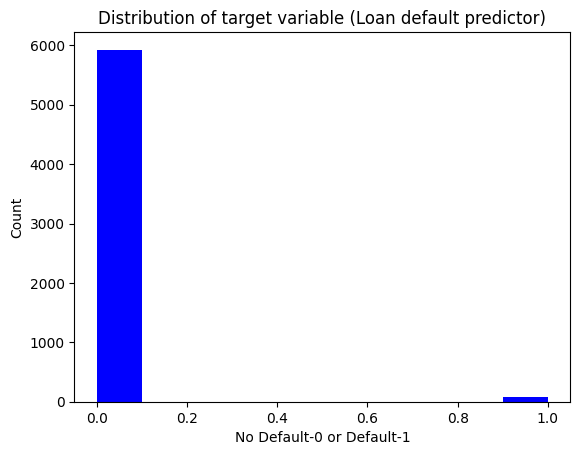

In [406]:
df_01.hist(column='default', grid=False, color='#0000FF')
plt.xlabel("No Default-0 or Default-1")
plt.ylabel("Count")
plt.title('Distribution of target variable (Loan default predictor)')

In [407]:
print("The target value 1-The client with payment difficulties is just",round((count[1]/count[0])*100,2),"% of total dataset and hence this is class imbalance problem.")

The target value 1-The client with payment difficulties is just 1.23 % of total dataset and hence this is class imbalance problem.


#SMOTE - Synthetic Minority Over Sampling Technique

In [408]:
sample_technique = SMOTE(random_state=42)
X, y = sample_technique.fit_resample(x_df, y_df)
print(Counter(y))

Counter({0: 5927, 1: 5927})


In [409]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

Text(0.5, 1.0, 'Distribution of target variable (Loan default predictor)')

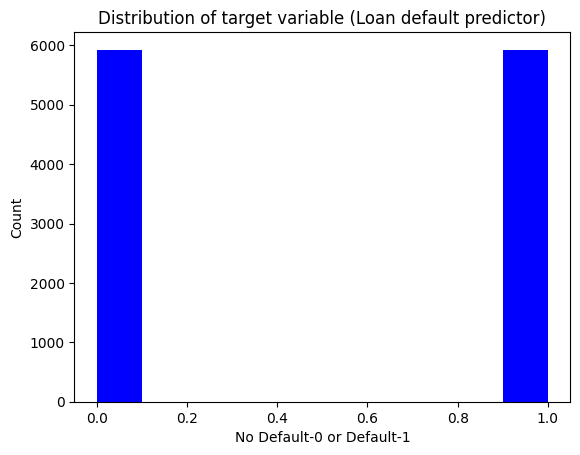

In [410]:
y.hist( grid=False, color='#0000FF')
plt.xlabel("No Default-0 or Default-1")
plt.ylabel("Count")
plt.title('Distribution of target variable (Loan default predictor)')



# Model 1 : Logistics Regression (baseline)

In [411]:
# Inisialisasi model Logistic Regression dengan class_weight balanced
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
print("Logistic Regression:", logreg)

# Train model
logreg.fit(xtrain, ytrain)

# 5-Fold Cross Validation (scoring AUC)
scores = cross_val_score(logreg, xtrain, ytrain, cv=5, scoring='roc_auc')
print("Mean 5-Fold CV AUC: %.4f" % scores.mean())

# 10-Fold Cross Validation dengan KFold (scoring AUC)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kf_cv_scores = cross_val_score(logreg, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print("K-Fold (10) CV AUC: %.4f" % kf_cv_scores.mean())

# Prediksi test set
ypred = logreg.predict(xtest)
yproba = logreg.predict_proba(xtest)[:, 1]  # Probabilitas kelas positif

# Evaluasi
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm)

cr = classification_report(ytest, ypred)
print("Classification Report:\n", cr)

# AUC pada test set
auc_test = roc_auc_score(ytest, yproba)
print("Test AUC Score: %.4f" % auc_test)

Logistic Regression: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
Mean 5-Fold CV AUC: 0.7939
K-Fold (10) CV AUC: 0.7941
Confusion Matrix:
 [[632 257]
 [234 656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       889
           1       0.72      0.74      0.73       890

    accuracy                           0.72      1779
   macro avg       0.72      0.72      0.72      1779
weighted avg       0.72      0.72      0.72      1779

Test AUC Score: 0.8033


#Model 2: Extreme Gradient Booster

In [412]:
# Inisialisasi model XGBoost
xgbc = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
print("XGB Model:", xgbc)

# Fit model
xgbc.fit(xtrain, ytrain)

# Cross-validation (5-fold)
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5, scoring='roc_auc')
print("Mean 5-Fold CV AUC: %.4f" % scores.mean())

# Cross-validation (10-fold with KFold)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print("K-Fold (10) CV AUC: %.4f" % kf_cv_scores.mean())

# Predict test set
ypred = xgbc.predict(xtest)
yproba = xgbc.predict_proba(xtest)[:, 1]

# Confusion matrix & classification report
cm4 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm4)

cr4 = classification_report(ytest, ypred)
print("Classification Report:\n", cr4)

# AUC on test set
auc_test = roc_auc_score(ytest, yproba)
print("Test AUC Score: %.4f" % auc_test)

XGB Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Mean 5-Fold CV AUC: 0.9933


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

K-Fold (10) CV AUC: 0.9940
Confusion Matrix:
 [[847  42]
 [  4 886]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       889
           1       0.95      1.00      0.97       890

    accuracy                           0.97      1779
   macro avg       0.98      0.97      0.97      1779
weighted avg       0.98      0.97      0.97      1779

Test AUC Score: 0.9958


In [413]:
# Skor Probabilistik → Skor Industri 300-850
def scorecard(prob, base_score=600, pdo=50):
    odds = prob / (1 - prob)
    score = base_score - pdo * np.log(odds)
    return np.clip(score, 300, 850)

scores = scorecard(gb_pred)
scores

/tmp/ipython-input-413-2811376285.py:3: RuntimeWarning: divide by zero encountered in divide
  odds = prob / (1 - prob)


array([850.        , 850.        , 821.02902813, ..., 850.        ,
       850.        , 839.7486408 ])

In [414]:

# Simpan skor prediksi untuk eksplorasi lebih lanjut
output_score_df = pd.DataFrame({
    'prob_default': gb_pred,
    'scorecard': scores
})
output_score_df.to_csv('scorecard_output.csv', index=False)


In [415]:
explainer = shap.Explainer(gb_model, xtest)
shap_values = explainer(xtest)


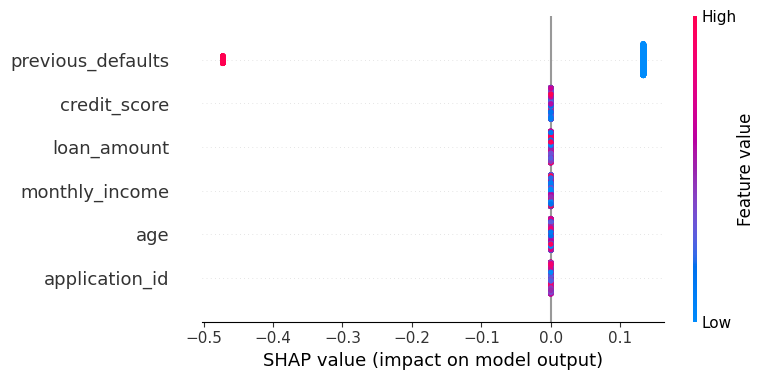

In [416]:
shap.summary_plot(shap_values, xtest, show=False)


In [417]:
def scorecard(prob, base_score=600, pdo=50):
    odds = prob / (1 - prob)
    score = base_score - pdo * np.log(odds)
    return np.clip(score, 300, 850)

scores = scorecard(gb_pred)

# Simpan skor prediksi untuk eksplorasi lebih lanjut
output_score_df = pd.DataFrame({
    'prob_default': gb_pred,
    'scorecard': scores
})
output_score_df.to_csv('scorecard_output.csv', index=False)


/tmp/ipython-input-417-1090728023.py:2: RuntimeWarning: divide by zero encountered in divide
  odds = prob / (1 - prob)


In [418]:
explainer = shap.Explainer(gb_model)
shap_values = explainer(X1test)

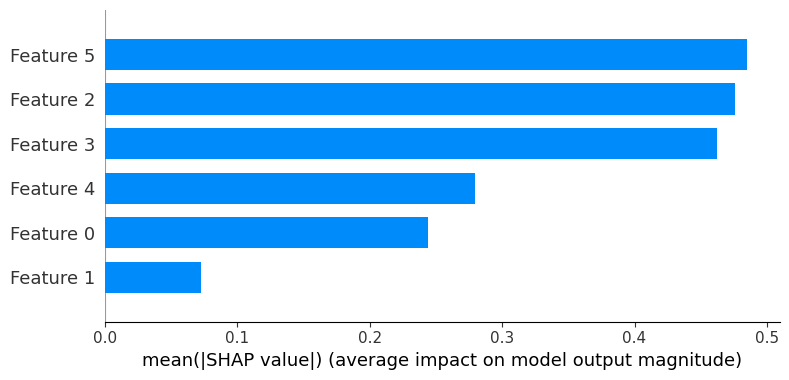

In [419]:
shap.summary_plot(shap_values, X1test, plot_type="bar", show=False)
plt.savefig("shap_top10.png")



#Conclusion
*   Model 5 (XGBoost + SMOTE) was identified as the best-performing model.
*     The final model used Extreme Gradient Boosting (XGBoost), enhanced with Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance.
*   Achieved precision of 99% in correctly identifying credit defaulters.
* Achieved recall of 90%, meaning it could detect 90% of actual credit defaults.
*The model was robust and well-calibrated, with supporting metrics validated using cross-validation and classification reports.

#Future Scope

1. Deploy the final ML model for real-world usage in credit scoring systems.
2. Develop a continuous credit score model (e.g., on a 300–850 scale), using regression techniques.
3. Improve model accuracy further by incorporating bureau-level or third-party adhoc data.
4. Build a dynamic scoring system using geospatial data (e.g., location-based economic conditions).
5.  Integrate transactional data such as bank statement scraping to enrich feature space and improve risk profiling.
# Challenges
1. Despite XGBoost with SMOTE being the best model, regulatory concerns may favor simpler, interpretable models (e.g., logistic regression).
2. The trade-off between model interpretability and accuracy is a key consideration in production deployment.
3.  Privacy concerns arise when sourcing alternative or sensitive data, especially for individuals with limited or no formal credit history.
4.  Detecting and removing leakage features (like leak_col_good, leak_col_subtle) was essential to avoid artificially inflated performance.